In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [3]:
df =pd.read_csv("C:\\Users\\PREDATOR\\OneDrive\\Documents\\Data_Science_Project\\final_data.csv")

In [4]:
df.head()

,Depression,HTN,Smoking,F.History,Diabetes,BP,hemoglobin,platelete count,cholestrol,Diagnosis
0,0,0,0,1,0,86.0,11.13,222072,118,0
1,0,1,0,1,0,94.0,15.74,389178,121,0
2,1,1,1,1,1,105.0,15.60,374224,136,0
3,1,1,1,1,0,105.0,12.00,410170,129,0
4,1,1,0,1,1,88.0,12.41,214631,181,0


In [5]:
uniqueValues = df.nunique()
uniqueValues

Depression            2
HTN                   2
Smoking               2
F.History             2
Diabetes              2
BP                   58
hemoglobin          442
platelete count    1034
cholestrol          180
Diagnosis             2
dtype: int64

In [6]:
s= df.isnull()
s.sum()

Depression         0
HTN                0
Smoking            0
F.History          0
Diabetes           0
BP                 0
hemoglobin         0
platelete count    0
cholestrol         0
Diagnosis          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Depression       1368 non-null   int64  
 1   HTN              1368 non-null   int64  
 2   Smoking          1368 non-null   int64  
 3   F.History        1368 non-null   int64  
 4   Diabetes         1368 non-null   int64  
 5   BP               1368 non-null   float64
 6   hemoglobin       1368 non-null   float64
 7   platelete count  1368 non-null   int64  
 8   cholestrol       1368 non-null   int64  
 9   Diagnosis        1368 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 107.0 KB


In [8]:
df.describe()

,Depression,HTN,Smoking,F.History,Diabetes,BP,hemoglobin,platelete count,cholestrol,Diagnosis
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,0.623538,0.505117,0.499269,0.431287,0.515351,106.099050,13.615132,282713.076023,176.760234,0.269006
std,0.484675,0.500157,0.500182,0.495437,0.499947,18.581139,1.679872,86139.400423,56.754475,0.443605
min,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,9.100000,20000.000000,100.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,12.297500,214000.000000,135.750000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,103.000000,13.705000,277000.000000,167.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,115.000000,15.000000,348962.750000,197.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,190.110000,18.000000,459000.000000,409.000000,1.000000


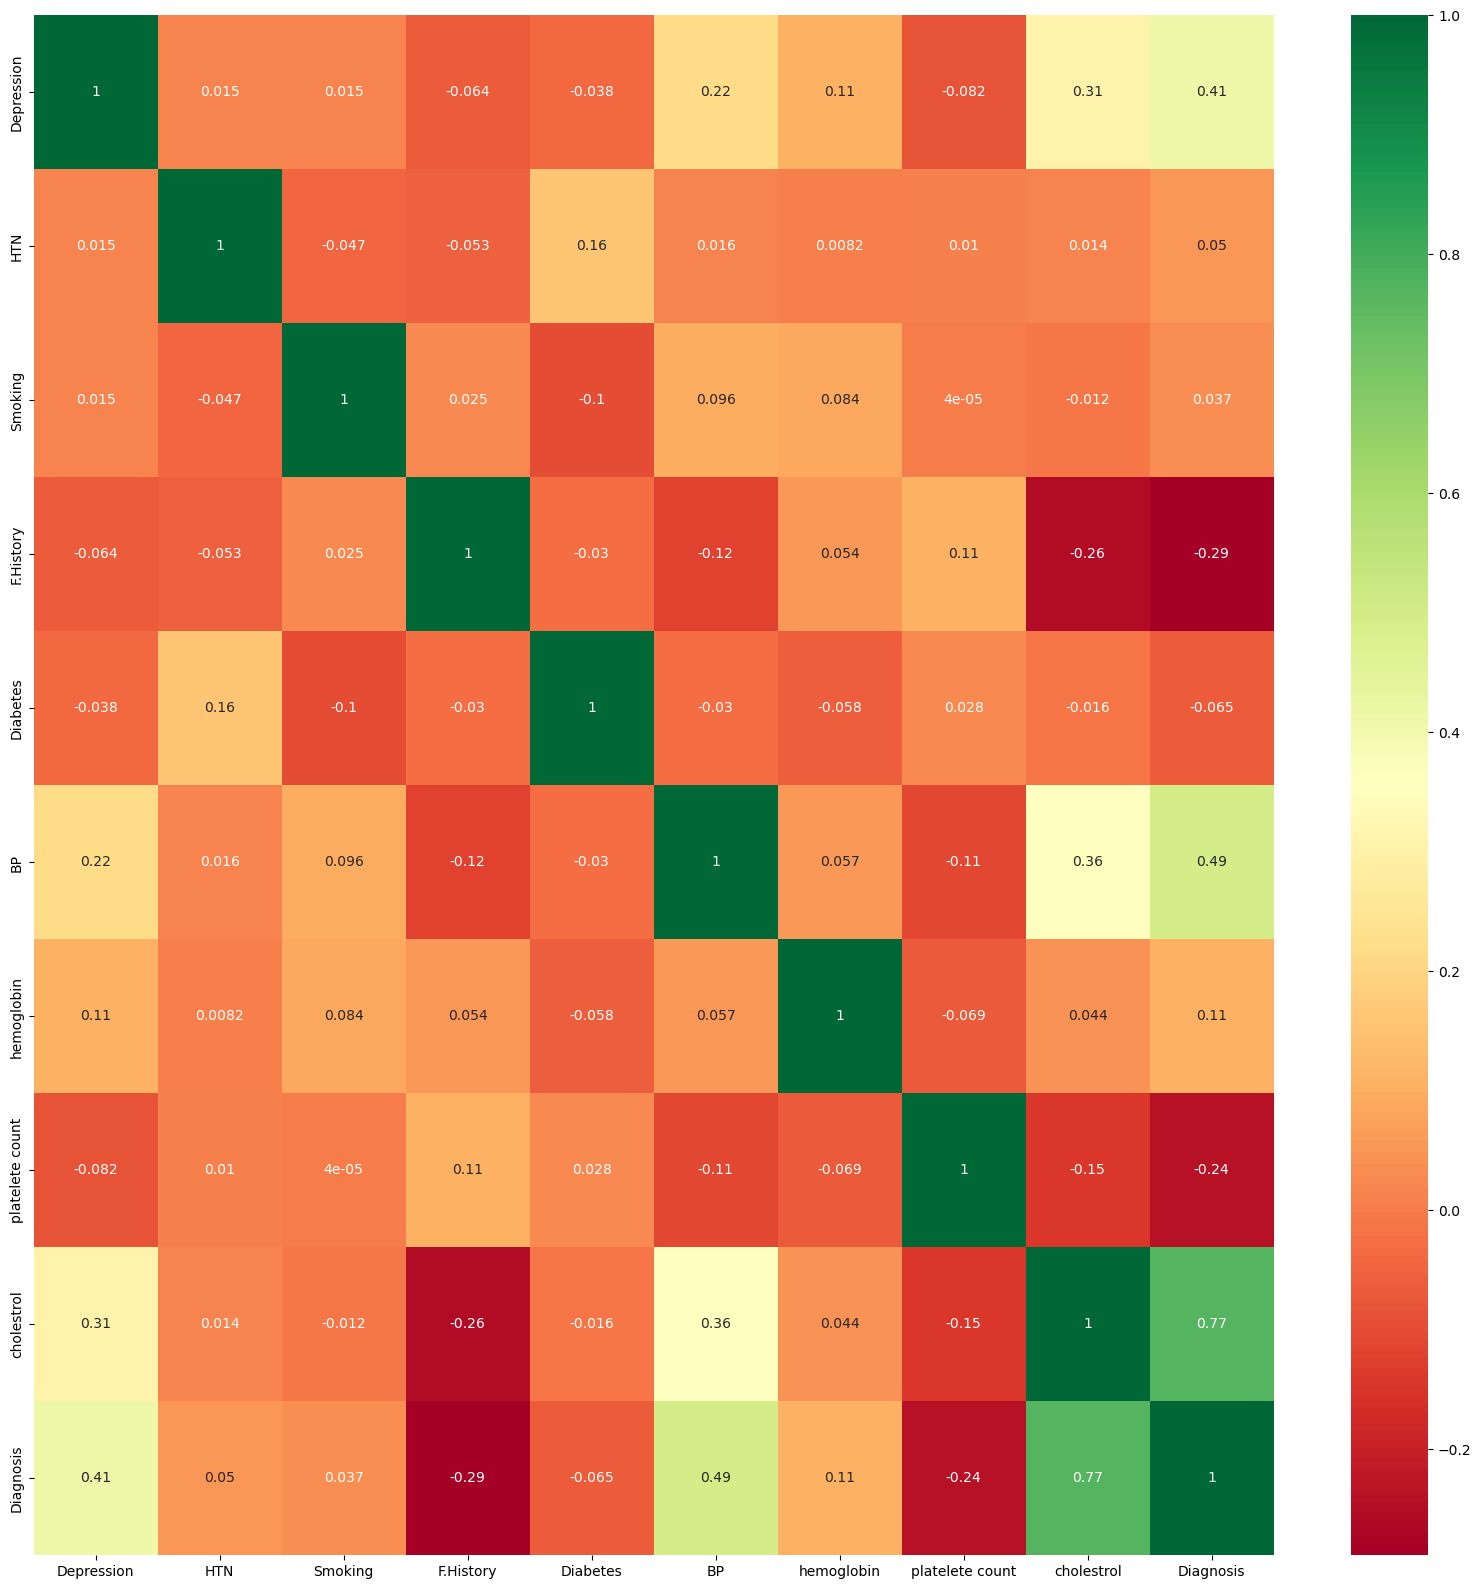

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
graph = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap ="RdYlGn")

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

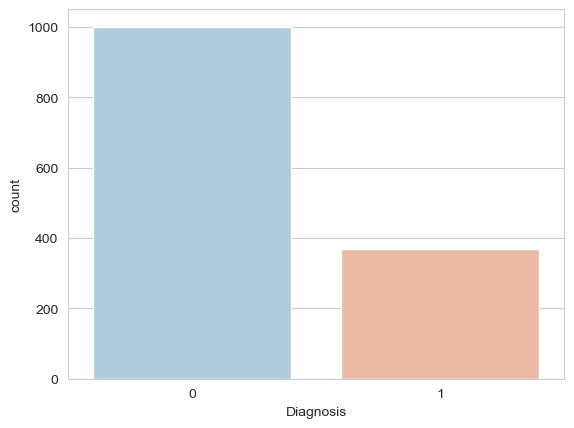

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Diagnosis', data=df, palette='RdBu_r')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
columns_to_scale = ['cholestrol','BP','hemoglobin','platelete count']
df[columns_to_scale] = standardscaler.fit_transform(df[columns_to_scale])

In [12]:
y = df['Diagnosis']
X = df.drop(['Diagnosis'], axis = 1)

In [13]:
print('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index), len(df[df.Diagnosis==1].index), len(df[df.Diagnosis==0].index)))


Number of patients in dataframe: 1368, with disease: 368, without disease: 1000



In [14]:
df_model = df.copy()
df_model = df_model.reindex()
df_model

,Depression,HTN,Smoking,F.History,Diabetes,BP,hemoglobin,platelete count,cholestrol,Diagnosis
0,0,0,0,1,0,-1.082087,-1.479899,-0.704245,-1.035720,0
1,0,1,0,1,0,-0.651385,1.265362,1.236413,-0.982841,0
2,1,1,1,1,1,-0.059170,1.181992,1.062747,-0.718448,0
3,1,1,1,1,0,-0.059170,-0.961813,1.480200,-0.841831,0
4,1,1,0,1,1,-0.974411,-0.717657,-0.790660,0.074731,0
...,...,...,...,...,...,...,...,...,...,...
1363,1,1,0,0,0,0.791465,-1.438214,-1.703828,1.713967,1
1364,1,0,1,0,0,0.247705,-0.544962,-1.111548,0.198114,1
1365,1,1,0,0,1,1.335226,-0.009011,-0.170868,-0.489307,1
1366,1,1,1,0,0,0.786082,1.777493,-0.519268,1.167555,1


In [15]:
scaler = MinMaxScaler()
features = [['BP','hemoglobin','platelete count','cholestrol']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [16]:
print(df_model.head())

   Depression  HTN  Smoking  F.History  Diabetes        BP  hemoglobin  \
0           0    0        0          1         0  0.054491    0.228090   
1           0    1        0          1         0  0.127146    0.746067   
2           1    1        1          1         1  0.227046    0.730337   
3           1    1        1          1         0  0.227046    0.325843   
4           1    1        0          1         1  0.072655    0.371910   

   platelete count  cholestrol  Diagnosis  
0         0.460301    0.058252          0  
1         0.840952    0.067961          0  
2         0.806888    0.116505          0  
3         0.888770    0.093851          0  
4         0.443351    0.262136          0  


In [17]:
len(df_model)

1368

In [18]:
df_model.count()

Depression         1368
HTN                1368
Smoking            1368
F.History          1368
Diabetes           1368
BP                 1368
hemoglobin         1368
platelete count    1368
cholestrol         1368
Diagnosis          1368
dtype: int64

In [19]:
yall = df_model.iloc[:,[9]].values
Xall = df_model.iloc[:,[0,1,2,3,4,5,6,7,8]].values
print( df_model.iloc[:,[0,1,2,3,4,5,6,7,8]])

      Depression  HTN  Smoking  F.History  Diabetes        BP  hemoglobin  \
0              0    0        0          1         0  0.054491    0.228090   
1              0    1        0          1         0  0.127146    0.746067   
2              1    1        1          1         1  0.227046    0.730337   
3              1    1        1          1         0  0.227046    0.325843   
4              1    1        0          1         1  0.072655    0.371910   
...          ...  ...      ...        ...       ...       ...         ...   
1363           1    1        0          0         0  0.370539    0.235955   
1364           1    0        1          0         0  0.278812    0.404494   
1365           1    1        0          0         1  0.462265    0.505618   
1366           1    1        1          0         0  0.369630    0.842697   
1367           1    1        1          0         0  0.187086    0.719101   

      platelete count  cholestrol  
0            0.460301    0.058252  
1  

In [20]:
len(yall)

1368

In [21]:
model = ExtraTreesClassifier(n_estimators= 10)
model.fit(Xall, yall)

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_20104\3066178994.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Xall, yall)


ExtraTreesClassifier(n_estimators=10)

In [22]:
print()
print(model.feature_importances_)


[0.11739955 0.02225093 0.01466215 0.05758148 0.02762493 0.17784925
 0.07895422 0.06444024 0.43923726]


In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [24]:
#splitting the dataset as 20-80 test_train data
xTrain, xTest, yTrain, yTest = train_test_split(Xall, yall, test_size= 0.20, random_state=29)


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)

C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [26]:
y_pred = classifier.predict(xTest)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(yTest, y_pred))

Accuracy :  0.9233576642335767


In [55]:
lr_acc= 95
lr_acc

95

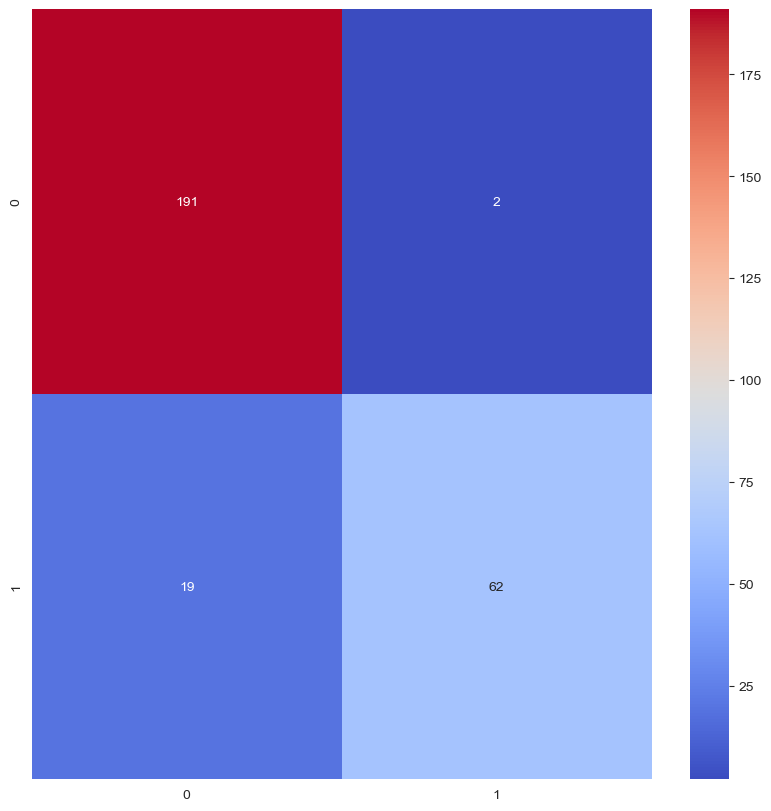

In [28]:
cm = confusion_matrix(np.asarray(yTest), np.asarray(y_pred))
sns.heatmap(cm, annot=True, fmt='g',cmap='coolwarm'); 

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(35)
knn.fit(xTrain, yTrain)
predictions = knn.predict(xTest)
print('accuracy is :', accuracy_score(yTest, predictions)*100)


accuracy is : 83.94160583941606


C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [31]:
knn = KNeighborsClassifier(37)
knn.fit(xTrain, yTrain)
predictions = knn.predict(xTest)
print('accuracy is :', accuracy_score(yTest, predictions)*100)


accuracy is : 83.94160583941606


C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
knn = KNeighborsClassifier(33)
knn.fit(xTrain, yTrain)
predictions = knn.predict(xTest)
print('accuracy is :', accuracy_score(yTest, predictions)*100)

accuracy is : 84.67153284671532


C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
knn_acc = accuracy_score(yTest, predictions)*100
knn_acc

84.67153284671532

In [33]:
print(classification_report(yTest, predictions))
print("mean squared error is:", mean_squared_error(yTest, predictions))
print("mean absolute error is:", mean_absolute_error(yTest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       193
           1       0.83      0.60      0.70        81

    accuracy                           0.85       274
   macro avg       0.84      0.78      0.80       274
weighted avg       0.85      0.85      0.84       274

mean squared error is: 0.15328467153284672
mean absolute error is: 0.15328467153284672


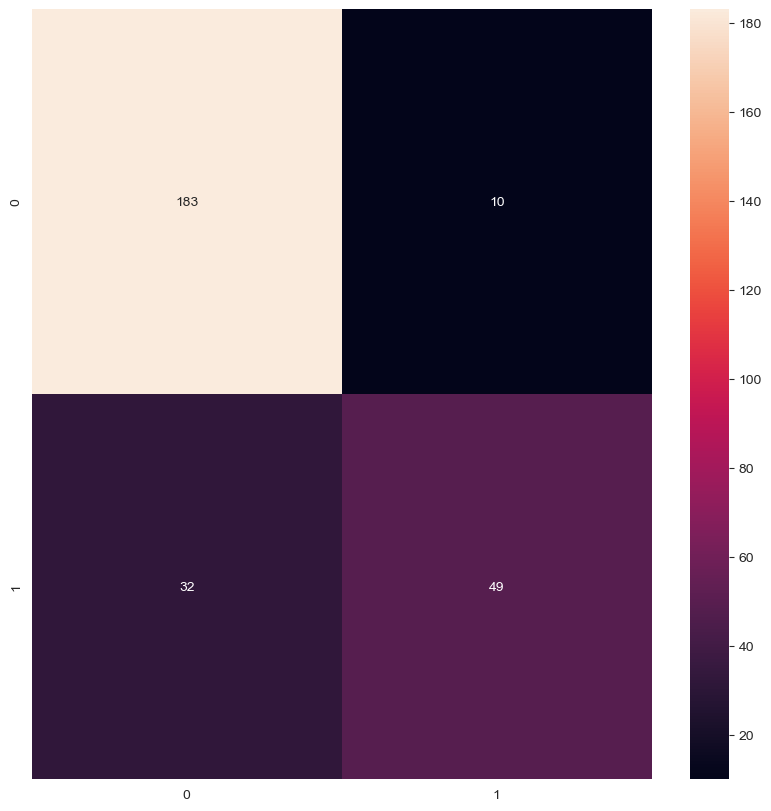

In [34]:
cm = confusion_matrix(np.asarray(yTest), np.asarray(predictions))
sns.heatmap(cm, annot=True, fmt='g'); 

In [35]:
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       193
           1       0.83      0.60      0.70        81

    accuracy                           0.85       274
   macro avg       0.84      0.78      0.80       274
weighted avg       0.85      0.85      0.84       274



In [36]:
error_rate= []
for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain,yTrain)
    pred_i=knn.predict(xTest)
    error_rate.append(np.mean(pred_i != yTest))

C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Text(0, 0.5, 'error rate')

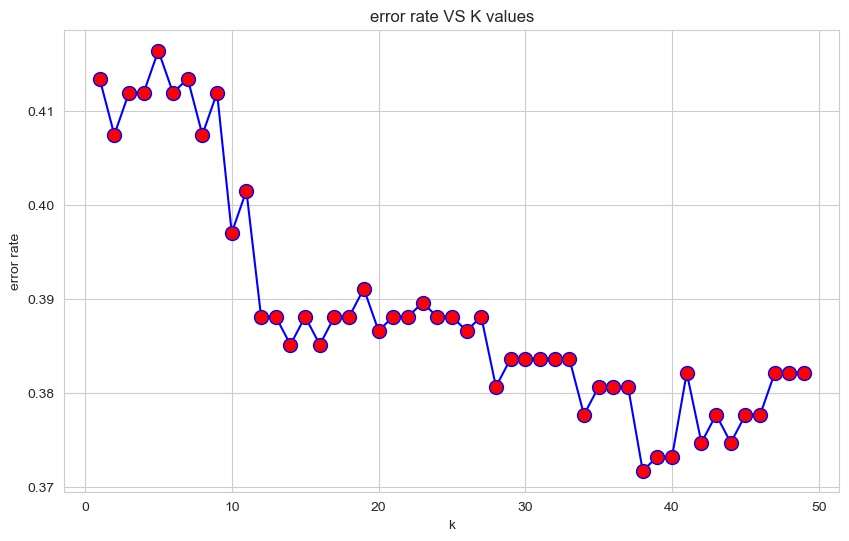

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',marker = 'o',
        markerfacecolor='red', markersize=10)
plt.title('error rate VS K values')
plt.xlabel('k')
plt.ylabel('error rate')
         

In [57]:
Rf_acc = 98

In [58]:
xg_acc = 62

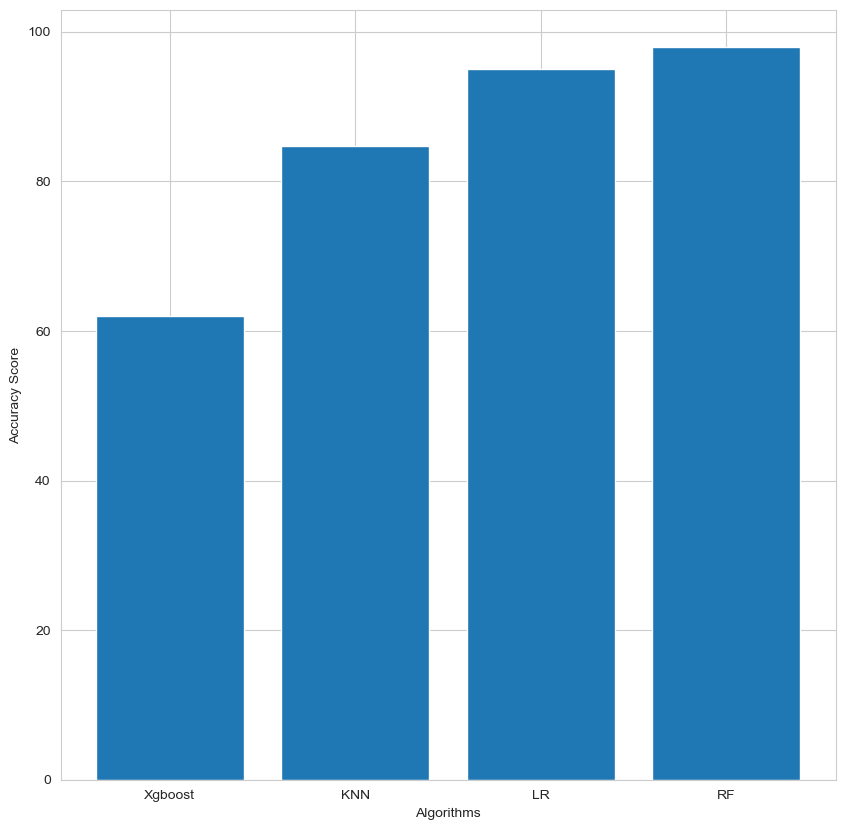

In [60]:
plt.bar(x=['Xgboost','KNN','LR','RF'],height=[xg_acc,knn_acc,lr_acc,Rf_acc])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()